In [3]:
# Data cleaning and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Preprocessing
from datetime import datetime 
from sklearn.preprocessing import StandardScaler

# Modelling
#import sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### 0. Extracting the Dataset

In [4]:
# Importing training data
tdata = pd.read_csv('Hotel-A-train.csv')
vdata = pd.read_csv('Hotel-A-validation.csv')
testdata = pd.read_csv('Hotel-A-test.csv')
tdata.shape , vdata.shape, testdata.shape
#dimensions match

((27499, 24), (2749, 24), (4318, 23))

In [9]:
tdata.columns , vdata.columns, testdata.columns
# columns match

(Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
        'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
        'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
        'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
        'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
        'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
       dtype='object'),
 Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
        'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
        'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
        'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
        'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
        'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
       dtype='object'),
 Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
 

In [10]:
tdata.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


### 1. Data Cleaning 

#### 1.1 Check for Missing values

In [33]:
tdata.info() , vdata.info(), testdata.info()
tdata.isna().sum() , vdata.isna().sum(), testdata.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

(Reservation-id            0
 Gender                    0
 Age                       0
 Ethnicity                 0
 Educational_Level         0
 Income                    0
 Country_region            0
 Hotel_Type                0
 Expected_checkin          0
 Expected_checkout         0
 Booking_date              0
 Adults                    0
 Children                  0
 Babies                    0
 Meal_Type                 0
 Visted_Previously         0
 Previous_Cancellations    0
 Deposit_type              0
 Booking_channel           0
 Required_Car_Parking      0
 Reservation_Status        0
 Use_Promotion             0
 Discount_Rate             0
 Room_Rate                 0
 dtype: int64,
 Reservation-id            0
 Gender                    0
 Age                       0
 Ethnicity                 0
 Educational_Level         0
 Income                    0
 Country_region            0
 Hotel_Type                0
 Expected_checkin          0
 Expected_checkout         0

#### 1.2. Check if  non numerical variable is taken as object type

In [6]:
cat_var = [c for c in tdata.columns if tdata[c].dtype == object]
cat_var
# Matches with Data Dictionary

['Gender',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Expected_checkin',
 'Expected_checkout',
 'Booking_date',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Reservation_Status',
 'Use_Promotion']

#### 1.3. EDA

#### Reservation Status Frequency

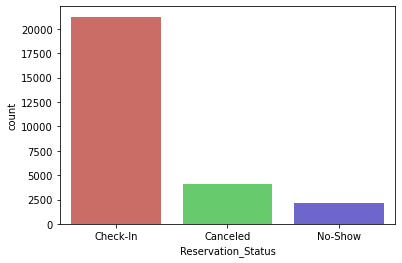

In [40]:
#tdata['Reservation_Status'].value_counts().plot(kind='bar', color=['lightpink','lightblue','lightgreen']);
sns.countplot(x='Reservation_Status',data=tdata, palette='hls');
plt.show();
# More number of Check-in . Not a ablanced dataset. 

In [43]:
tdata.groupby('Reservation_Status').mean()

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
Reservation_Status,,,,,,,
Canceled,5.077175e+07,44.157233,2.309869,1.756410,0.336720,12.519352,174.994436
Check-In,5.005210e+07,43.956638,2.334463,1.740631,0.351977,12.504708,175.088041
No-Show,5.010803e+07,43.835765,2.370824,1.752000,0.376000,12.352941,175.896941


#### Reservation Status according to Gender

In [35]:
tdata['Gender'].value_counts()

F    13799
M    13700
Name: Gender, dtype: int64

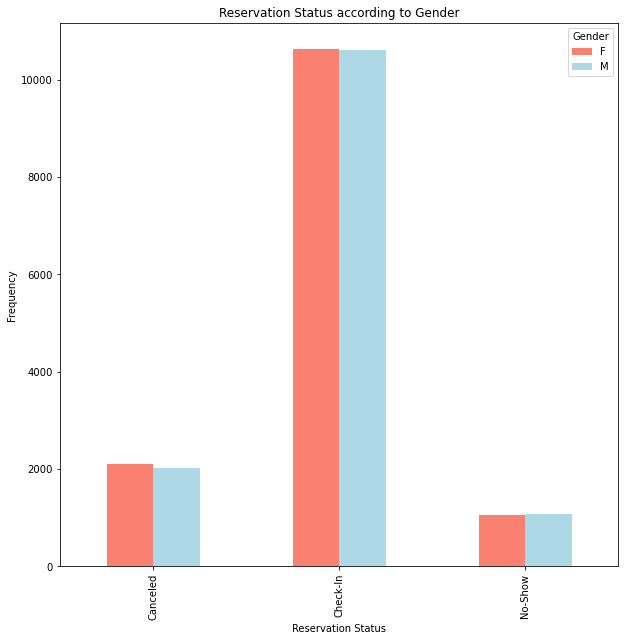

In [39]:
pd.crosstab(tdata['Reservation_Status'],tdata['Gender']).plot(kind='bar',
                                                             figsize=(10,10),
                                                             color=['salmon','lightblue']);
plt.title('Reservation Status according to Gender');
plt.xlabel('Reservation Status');
plt.ylabel('Frequency');

## On Hold

### Dummy variables: One-hot Encoding

In [10]:
tdata['cat_var']

KeyError: 'cat_var'